# Naive Bayes classifier概述
Naive Bayes classifier是一種分類方法，其目標為在輸入一個新的測試樣本$X=X_f$（或稱預測樣本以下標$f$表示）時，我們能夠透過訓練樣本的分佈狀況來判斷應將其分到哪一類別，首先，我們先定義訓練樣本與特徵項，訓練樣本集$T=\{(X_{1}, y_{1}),(X_{2}, y_{2}), \cdots,(X_{n}, y_{n})\}$，$X_i=(x_{i}^{(1)}, x_{i}^{(2)}, ......, x_{i}^{(k)})^T$且$y_i \in \{c_1,c_2,\cdots, c_m\}$有$m$種分類類別。<br>

Naive Bayes classifier的核心為，在給定一個新的測試樣本$X=X_f$，分別計算在$X=X_f$水準下每一類別的發生機率，接著選出發生機率最高的那個類別作為輸出$y_f$，可以將上述表達為以下：
$$
y_f=\arg \max _{c_{j}} P(y=c_j| X=X_f)
$$

上述做的事稱作後驗機率最大化，$P(y=c_j| X=X_f)$稱為後驗機率。
我們可以將$P(y=c_j| X=X_f)$透過貝氏定理分解一下：

$$
P(y=c_j| X=X_f)=\frac{P(X=X_f,y=c_j)}{P(X=X_f)}=\frac{P(X=X_f| y=c_j)P(y=c_j)}{P(X=X_f)}
$$

還可以將$P(X=X_f)$改寫一下，這邊可以想像成因為總共有$m$個類別，因此若要算出$X=X_f$的機率$P(X=X_f)$等於是把給每個類別下的$X=X_f$的發生機率加總：
$$
\frac{P(X=X_f| y=c_j)P(y=c_j)}{P(X=X_f)}=\frac{P(X=X_f| y=c_j)P(y=c_j)}{\sum_{j=1}^m P(X=X_f| y=c_j)P(y=c_j)}
$$

別忘了每個樣本$X$有$k$個特徵維度，因此$P(X=X_f| y=c_j)=P\left(X^{(1)}=X_f^{(1)}, \cdots, X^{(k)}=X_f^{(k)} | y=c_{j}\right)$，實際想要估計它是不可行的，因為當中有太多機率參數要估計，因此Naive Bayes classifier做了個很強的假設來簡化，「條件獨立性的假設」，假設給定類別的情況下特徵之間是獨立的，因此我們可得：

$$\begin{aligned} P(X&=X_f | y=c_{j} )=P\left(X^{(1)}=X_f^{(1)}, \cdots, X^{(k)}=X_f^{(k)} | y=c_{j}\right) \\ &=\prod_{i=1}^{k} P\left(X^{(i)}=X_f^{(i)} | y=c_{j}\right) \end{aligned}$$

最後我們可以將極大化後驗機率的目標式改寫為：

$$y_f=\arg \max \frac{P(y=c_j)\prod_{i=1}^{k} P\left(X^{(i)}=X_f^{(i)} | y=c_{j}\right)}{\sum_{j=1}^m P(y=c_j)\prod_{i=1}^{k} P\left(X^{(i)}=X_f^{(i)} | y=c_{j}\right)}$$

很剛好的，上式的分母部份對於每個$c_j$來說都是相同的，因此最後還能將極大化後驗機率的目標式簡化改寫成以下：

$$y_f=\arg \max P(y=c_j)\prod_{i=1}^{k} P\left(X^{(i)}=X_f^{(i)} | y=c_{j}\right)$$


## 參數估計與算法

上一節中，提到的所有機率$P(\cdot)$都是母體未知的，因此我們需要經由訓練樣本來估計上述的那些機率，藉此才能對於極大化後驗機率有具體的算法，估計的方式有最大概似估計式與貝氏估計式

### 最大概似估計式
$$
\hat{P}(y=c_j)=\frac{\sum_{i=1}^n I(y_i=c_j)}{n},  j=1,2,...,m
$$

$$
P\left(X^{(k)}=a_{kl} | y=c_{j}\right)=\frac{\sum_{i=1}^n I(X_i^k=a_{kl}, y_i=c_j)}{\sum_{i=1}^n I(y_i=c_j)}
$$

$k=1,2,\cdots,k\\l=1,2,\cdots,S_k\\j=1,2,...,m$
$X_{i}^k$為第i個樣本的第$k$個特徵<br>
$a_{kl}$為第k個特徵中第l個可能取值<br>
$S_k$為第k個特徵中可能取值的數量
### 貝氏估計式
訓練樣本當中若不存在和預測樣本相同的$X=X_f$水準值，採用最大概似估計式會出現機率估計值0的狀況，從而產生分類的偏差，因此解決這一問題通常採用貝氏估計式。估計式如下：

$$
\hat{P_\lambda}(y=c_j)=\frac{\sum_{i=1}^n I(y_i=c_j)+\lambda}{n+m\lambda}
$$

$$
P\left(X^{(k)}=a_{kl} | y=c_{j}\right)=\frac{\sum_{i=1}^n I(X_i^k=a_{kl}, y_i=c_j) + \lambda}{\sum_{i=1}^n I(y_i=c_j)+m\lambda}
$$

$k=1,2,\cdots,k\\l=1,2,\cdots,S_k\\j=1,2,...,m$
$X_{i}^k$為第i個樣本的第$k$個特徵<br>
$a_{kl}$為第k個特徵中第l個可能取值<br>
$S_k$為第k個特徵中可能取值的數量

### Gaussion Naive Bayes

我們通常也可以假設某個特徵$x$在給定$y$的情況下，$x|y$服從Gaussion distibution，藉此用來計算機率，計算公式如下：

$$P(x_i | y=c_j)=\frac{1}{\sqrt{2\pi\sigma^2_{j}}}exp(-\frac{(x_i-\mu_{j})^2}{2\sigma^2_{j}})$$

其中，在上式pdf中，根據不同的類別下特徵$x$會有不同$\mu$與$\sigma^2$，且$\hat\mu$與$\hat\sigma^2$的估計是透過訓練樣本來估計的。

### 補充

1. 其實Naive Bayes classifier採用極大化後驗機率來挑選最佳分類這件事，也等價於在風險函數為0-1函數時極小化期望風險。
2. Naive Bayes classifier做了條件獨立性的假設，大大的簡化了學習與預測的過程，使該方法高效且易於實現，不過相對的它也犧牲了點分類的準確性。

# python sklearn實現Gaussion Naive Bayes

下方將透過sklearn內建的load_digits數據集實現Gaussion Naive Bayes，首先2.1會單純的使用Gaussion Naive Bayes來建立多分類的算法並介紹該分類器基本的輸出，2.2將會比較決策樹、logistic regression以及Gaussion Naive Bayes在不同樣本上的訓練表現與預測表現並結合運算時間比較。


## 建立Gaussion Naive Bayes算法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits() 
X, y = digits.data, digits.target

In [3]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=123)

In [4]:
# 觀察數據有多少特徵
Xtrain.shape 

(1257, 64)

In [5]:
Xtest.shape

(540, 64)

In [6]:
# 觀察此數據是多少類別的分類問題
np.unique(Ytrain) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
# 建立Gaussion Naive Bayes
gnb = GaussianNB().fit(Xtrain,Ytrain)

In [10]:
# 返回預測accuracy
acc_score = gnb.score(Xtest,Ytest) 

In [11]:
acc_score

0.8444444444444444

In [16]:
# 預測結果 array中的數字代表每個測試樣本的預測類別
Y_pred = gnb.predict(Xtest)
Y_pred

array([3, 3, 4, 4, 1, 3, 1, 0, 7, 4, 0, 0, 5, 1, 6, 0, 3, 1, 0, 6, 9, 7,
       7, 5, 4, 4, 7, 0, 0, 8, 1, 6, 8, 6, 1, 7, 6, 2, 1, 6, 0, 6, 2, 0,
       2, 3, 3, 8, 7, 1, 3, 1, 6, 5, 8, 6, 4, 6, 0, 4, 3, 5, 6, 2, 5, 8,
       8, 2, 0, 9, 7, 9, 4, 7, 8, 9, 4, 3, 3, 1, 2, 5, 4, 6, 1, 2, 4, 1,
       4, 5, 8, 4, 1, 7, 6, 7, 5, 5, 6, 8, 9, 4, 6, 6, 8, 1, 7, 3, 6, 4,
       9, 8, 7, 0, 9, 0, 2, 9, 0, 5, 1, 7, 4, 1, 2, 0, 7, 3, 6, 8, 8, 5,
       8, 3, 3, 9, 6, 7, 4, 0, 7, 3, 2, 2, 1, 7, 8, 1, 7, 1, 5, 7, 9, 1,
       3, 8, 6, 0, 7, 9, 6, 0, 1, 6, 3, 1, 5, 8, 1, 6, 1, 8, 6, 1, 8, 4,
       4, 2, 0, 5, 4, 0, 7, 0, 7, 5, 8, 4, 8, 8, 3, 7, 9, 8, 8, 0, 3, 4,
       9, 4, 1, 1, 7, 0, 5, 4, 5, 8, 2, 1, 4, 2, 0, 8, 7, 3, 8, 9, 1, 3,
       8, 0, 6, 0, 2, 8, 7, 5, 4, 7, 0, 1, 5, 5, 0, 9, 3, 7, 7, 1, 4, 2,
       4, 7, 1, 3, 0, 8, 2, 7, 6, 6, 3, 5, 6, 4, 5, 4, 6, 5, 7, 7, 9, 9,
       1, 0, 4, 6, 1, 7, 3, 8, 8, 1, 0, 4, 5, 4, 8, 2, 5, 8, 4, 0, 8, 3,
       1, 6, 6, 4, 6, 1, 4, 6, 6, 4, 1, 5, 1, 0, 1,

In [19]:
# 可以查看每個預測樣本 預測為每個類別的機率
prob = gnb.predict_proba(Xtest)
prob

array([[0.00000000e+000, 2.11342683e-152, 7.22118113e-067, ...,
        0.00000000e+000, 4.92469300e-084, 5.31362317e-008],
       [0.00000000e+000, 2.48222602e-025, 6.59414290e-068, ...,
        0.00000000e+000, 1.16744651e-079, 5.52463643e-007],
       [0.00000000e+000, 1.14900217e-036, 2.12220328e-247, ...,
        5.42110443e-021, 2.74614562e-062, 2.23530536e-083],
       ...,
       [1.55878283e-298, 7.99596165e-147, 3.25437066e-065, ...,
        0.00000000e+000, 2.51705635e-078, 1.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 4.46267830e-044, ...,
        6.70971098e-037, 4.93197191e-069, 1.24034527e-110],
       [0.00000000e+000, 7.30803915e-021, 0.00000000e+000, ...,
        3.33334904e-005, 1.32189243e-184, 3.57832534e-091]])

In [20]:
# 可簡易的驗證每個預測樣本內每一類的機率加總等於1
prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [22]:
from sklearn.metrics import confusion_matrix as CM
CM(Ytest,Y_pred)

array([[58,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  2,  4],
       [ 0,  6, 33,  1,  0,  0,  0,  0, 13,  0],
       [ 0,  1,  1, 39,  0,  0,  0,  2,  3,  0],
       [ 0,  0,  0,  0, 54,  1,  0,  6,  0,  0],
       [ 0,  0,  0,  3,  1, 49,  0,  2,  2,  0],
       [ 0,  0,  0,  0,  1,  0, 56,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 49,  0,  0],
       [ 0, 10,  0,  1,  0,  1,  0,  5, 31,  0],
       [ 0,  4,  1,  0,  1,  1,  0,  5,  4, 37]])

## 與其他算法比較多分類的預測表現

In [48]:
from time import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.linear_model import LogisticRegression as LR
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve # 和樣本數相關的學習曲線
from sklearn.model_selection import ShuffleSplit # 自定義交叉驗證
import warnings
warnings.filterwarnings('ignore')

In [75]:
# learning_curve一開始就會將總樣本以train_sizes的比例切分當成該次建模的總樣本

def plot_lc(estimator,title, X, y, 
                        ax, 
                        cv=None,
                       ):
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X,
                                                            y,
                                                            train_sizes=np.arange(0.1,1.1,0.1),
                                                            cv=cv)    
    ax.set_title(title)
    ax.set_xlabel("Training size")
    ax.set_ylabel("Score")
    ax.grid()
    
    # y軸為交叉驗證下的平均損失
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

In [77]:
title = ["Gaussion Naive Bayes","DecisionTree","Logistic"]
model = [GaussianNB(),DTC(),LR(C=.1,solver="lbfgs",max_iter=200)]

# 做了50次交叉驗證且每次測試樣本的比例有20%
cv = ShuffleSplit(n_splits=50, test_size=0.2, random_state=200)

Gaussion Naive Bayes:00:01:567054
DecisionTree:00:03:556083
Logistic:00:45:950372


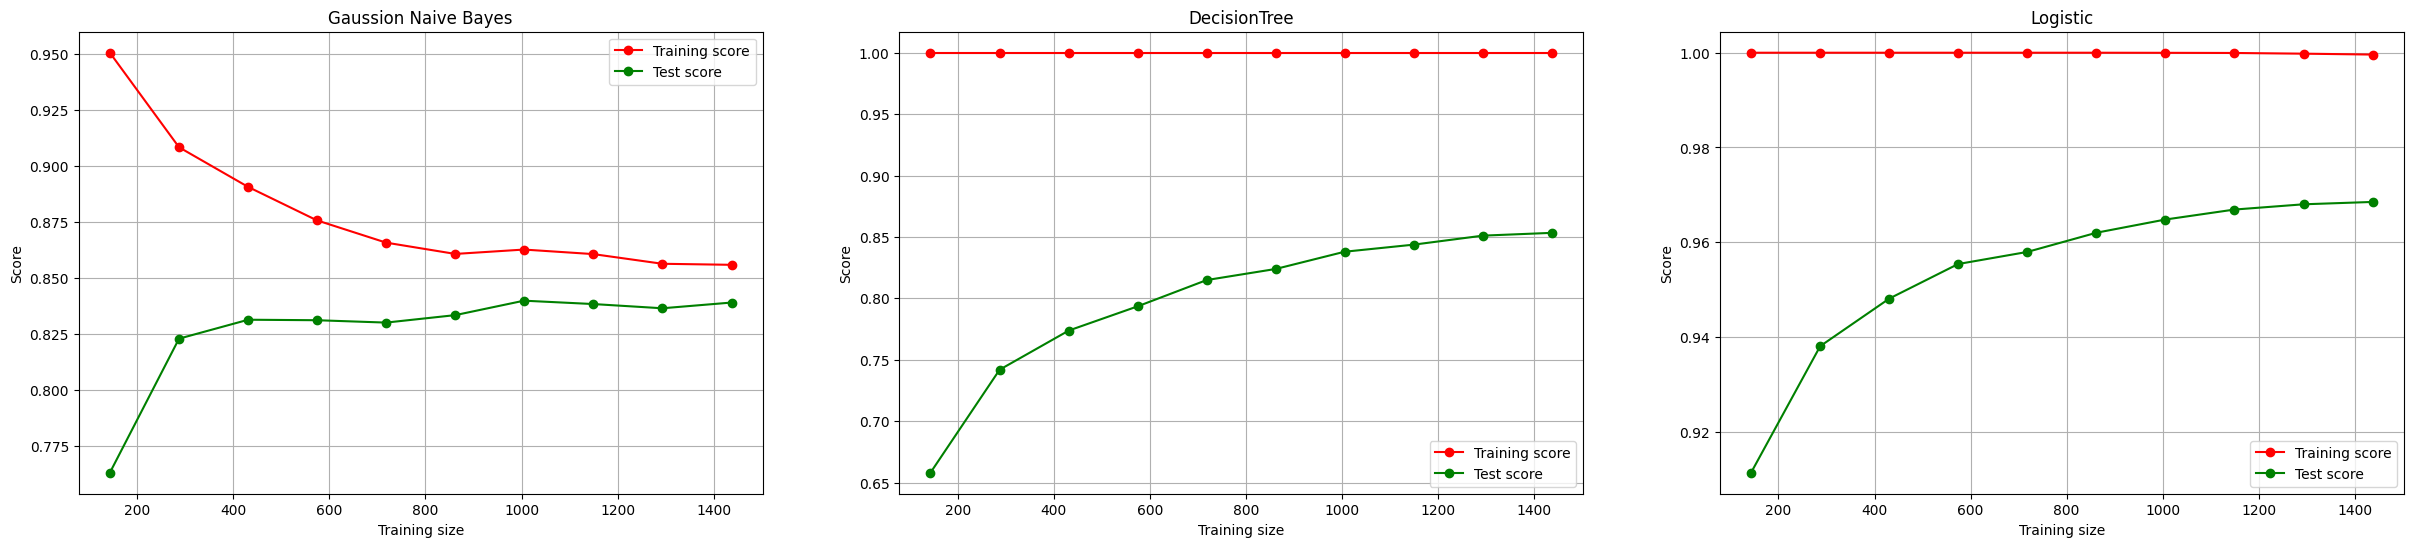

In [78]:
fig, axes = plt.subplots(1,3,figsize=(30,6))
for index, title_, estimator in zip(range(len(title)),title,model):
    times = time()
    plot_lc(estimator, title_, X, y,
                        ax=axes[index],cv=cv)
    print("{}:{}".format(title_,datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f")))
plt.show()

根據上面的結果，以預測表現來看的話，Gaussion Naive Bayes在這組數據上存在著隨總樣本增加使訓練表現下降、預測表現增加的現象，這個現象我暫時還不清楚原因，不過，可以觀察到Gaussion Naive Bayes在小樣本上的表現是不錯的（比決策樹好）；在考慮三種算法的時間，可發現Gaussion Naive Bayes的速度是最快的，綜合以上得到在小樣本集上，若想快速得到一個不錯的模型可以使用Gaussion Naive Bayes。

In [30]:
#a=zip(range(len(title)),title,model)
#list(a)

[(0, 'Gaussion Naive Bayes', GaussianNB()),
 (1, 'DecisionTree', DecisionTreeClassifier()),
 (2, 'Logistic', LogisticRegression(C=0.1, max_iter=200))]

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])